**File for testing how the throughput changes with different angles of incidence (AOI).**

In [215]:
import sys, os, glob
import matplotlib.pyplot as plt
oceandirect_path = 'C:/Program Files/Ocean Optics/OceanDirect SDK/Python/'
sys.path.append(os.path.abspath(oceandirect_path))
from Read_Spectrum import *
import pandas as pd
import matplotlib.cm as cm
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d
from matplotlib.colors import LinearSegmentedColormap
from scipy.optimize import curve_fit

Data formatted as Filter_Throughput_angle in degrees, for the angle of incidence

In [214]:
# No filter 10:25AM, turned on 9:45AM
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Base_Throughput.csv')

In [213]:
# 31 C rim 10:27AM. All temps at 31C. 0 deg incidence at 196 marking on the rotation mount
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_0.csv')

In [212]:
# 10:32 AM
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_5.csv')

In [211]:
# 10:33
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_10.csv')

In [210]:
# 10:34
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_11.csv')

In [209]:
# 10:35
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_12.csv')

In [208]:
# 10:35
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_13.csv')

In [207]:
# 10:36
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_14.csv')

In [206]:
# 10:37
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_15.csv')

In [205]:
# 10:38
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_16.csv')

In [204]:
# 10:38
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_17.csv')

In [203]:
# 10:39
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_18.csv')

In [202]:
# 10:39
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_19.csv')

In [201]:
# 10:40
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_20.csv')

In [200]:
# 10:42
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_21.csv')

In [199]:
# 10:43
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_22.csv')

In [198]:
# 10:43
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_23.csv')

In [197]:
# 10:44
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_24.csv')

In [196]:
# 10:44
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_25.csv')

In [195]:
# 10:46, 226 deg
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_30.csv')

In [194]:
# 10:46, 231 deg
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_35.csv')

In [193]:
# 10:47, 236 deg
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_40.csv')

In [192]:
# 10:48, 241 deg
# read_spectra(read_all_serial_numbers()[0], 30000, 5, './Spectral_Files/AOI_Spectra/Filter_Throughput_45.csv')

In [191]:
# Taking 10 dark frames with the filter in place but the light source off
# read_spectra(read_all_serial_numbers()[0], 30000, 10, './Spectral_Files/Darks/Dark_30000.csv')

**Now that I've taken the data for different angles of incidence, analyze how the wavelength of peak throughput changes with different angles of incidence. Correct for noise by subtracting dark frames.**

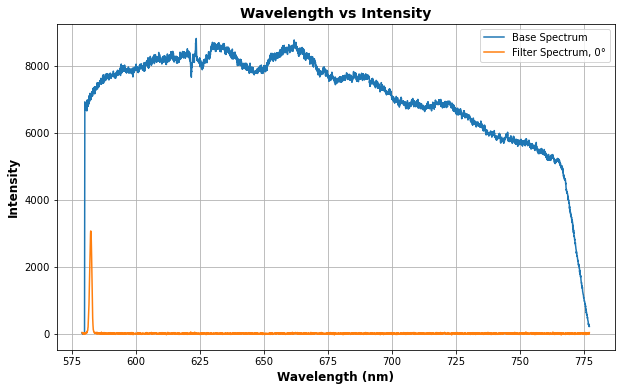

In [50]:
df_base = pd.read_csv('./Spectral_Files/AOI_Spectra/Base_Throughput.csv')
df = pd.read_csv('./Spectral_Files/AOI_Spectra/Filter_Throughput_25.csv')
dark_frame = pd.read_csv('./Spectral_Files/Darks/Dark_30000.csv')

median_dark_intensity = dark_frame.iloc[:, 1:].median(axis=1)
median_base_intensity = df_base.iloc[:, 1:].median(axis=1) - median_dark_intensity
median_spectral_intensity = df.iloc[:, 1:].median(axis=1) - median_dark_intensity

result_base = pd.DataFrame({
    'Wavelength': df_base.iloc[:, 0],
    'Median_Spectral_Intensity': median_base_intensity
})
result = pd.DataFrame({
    'Wavelength': df.iloc[:, 0],
    'Median_Spectral_Intensity': median_spectral_intensity
})

# Step 4: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(result_base['Wavelength'], result_base['Median_Spectral_Intensity'], marker=' ', linestyle='-', label='Base Spectrum')
plt.plot(result['Wavelength'], result['Median_Spectral_Intensity'], marker=' ', linestyle='-', label='Filter Spectrum, 0°')
plt.title('Wavelength vs Intensity', fontweight='bold', fontsize=14)
plt.xlabel('Wavelength (nm)', fontweight='bold', fontsize=12)
plt.ylabel('Intensity', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

Plot percent throughput of different angles of incidence from 0 to 25 degrees where it cuts off

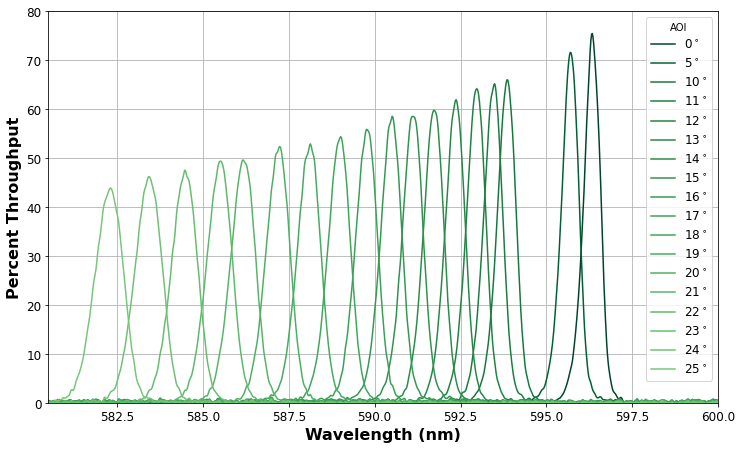

In [217]:
csv_files = glob.glob('./Spectral_Files/AOI_Spectra/*.csv')
dark_frame = pd.read_csv('./Spectral_Files/Darks/Dark_30000.csv')
baseline = pd.read_csv('./Spectral_Files/AOI_Spectra/Base_Throughput.csv')

median_dark_intensity = dark_frame.iloc[:, 1:].median(axis=1)

# Step 2: Extract angles and sort files based on angles
def extract_angle(file):
    filename = os.path.basename(file)
    if filename.startswith('Filter_Throughput_'):
        angle_str = filename.split('_')[-1].split('.')[0]
        return int(angle_str)
    return None

# Filter and sort files
csv_files = [file for file in csv_files if extract_angle(file) is not None]
csv_files.sort(key=extract_angle)

# Initialize a plot
plt.figure(figsize=(12, 7.2))

# Extract angles for normalization
angles = [extract_angle(file) for file in csv_files if extract_angle(file) <= 25]

# Normalize angles to the range [0, 25] degrees
norm = plt.Normalize(0, 25)

# Create a custom colormap from the darker part of BuGn
original_cmap = cm.YlGn
colors = original_cmap(np.linspace(1, 0.5, 256))  # Use the range [0.3, 1] to get darker colors

custom_cmap = LinearSegmentedColormap.from_list('CustomYlGn', colors)

# Step 3: Iterate through the sorted CSV files and plot
for file in csv_files:
    angle = extract_angle(file)
    if angle is not None and angle <= 25:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file)
        
        # Subtract dark frames and normalize by the baseline intensity
        median_base_intensity = baseline.iloc[:, 1:].median(axis=1) - median_dark_intensity
        median_spectral_intensity = df.iloc[:, 1:].median(axis=1) - median_dark_intensity
        normalized_intensity = median_spectral_intensity.div(median_base_intensity, axis=0)
        
        # Combine the wavelengths with their corresponding normalized spectral intensity
        result = pd.DataFrame({
            'Wavelength': df.iloc[:, 0],
            'Normalized_Spectral_Intensity': normalized_intensity
        })
        
        # Interpolate the normalized spectral intensity data
        spline = UnivariateSpline(result['Wavelength'], result['Normalized_Spectral_Intensity'], s=0)
        fine_wavelengths = np.linspace(580, 600, 1000)  # Fine grid over a given range of wavelengths
        interpolated_intensity = spline(fine_wavelengths)
        
        # Get the color from the custom colormap
        colormap = custom_cmap(norm(angle))
        
        # Plot the interpolated data
        plt.plot(fine_wavelengths, interpolated_intensity * 100, marker=' ', linestyle='-', label=f'{angle}$^\circ$', color=colormap)

# Step 4: Customize the plot
plt.xlim(580.5, 600)
plt.ylim(0, 80)
# plt.title('Throughput vs Wavelength at Different Angles of Incidence', fontweight='bold', fontsize=18)
plt.xlabel('Wavelength (nm)', fontweight='bold', fontsize=16)
plt.ylabel('Percent Throughput', fontweight='bold', fontsize=16)
plt.legend(title='AOI', fontsize=12)
plt.grid(True)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.show()

Calculate peak wavelength for normal incidence

In [162]:
def calculate_fwhm(wavelengths, intensities):
    half_max = np.max(intensities) / 2.0
    f = interp1d(wavelengths, intensities - half_max, kind='linear')
    interpolated_values = f(wavelengths)
    roots = np.where(np.diff(np.sign(interpolated_values)))[0]
    if len(roots) >= 2:
        fwhm = wavelengths[roots[-1]] - wavelengths[roots[0]]
    else:
        fwhm = np.nan
    return fwhm

In [119]:
def gaussian(x, amplitude, centroid, sigma):
    return amplitude * np.exp(-(x - centroid)**2 / (2 * sigma**2))

In [122]:
def extract_angle(file):
    filename = os.path.basename(file)
    if filename.startswith('Filter_Throughput_'):
        angle_str = filename.split('_')[-1].split('.')[0]
        return int(angle_str)
    return None

Find peak wavelength and FWHM by interpolation

In [218]:
# Find wavelength fo peak emission with interpolated data (spline), and FWHM

# Step 1: List the CSV files
csv_files = glob.glob('./Spectral_Files/AOI_Spectra/*.csv')
dark_frame = pd.read_csv('./Spectral_Files/Darks/Dark_30000.csv')
baseline = pd.read_csv('./Spectral_Files/AOI_Spectra/Base_Throughput.csv')

median_dark_intensity = dark_frame.iloc[:, 1:].median(axis=1)

# Filter and sort files
csv_files = [file for file in csv_files if extract_angle(file) is not None]
csv_files.sort(key=extract_angle)

# Extract angles for normalization
angles = [extract_angle(file) for file in csv_files if extract_angle(file) <= 25]
peak_wavelengths = []
FWHMs = []

# Step 3: Iterate through the sorted CSV files and plot
for file in csv_files:
    angle = extract_angle(file)
    if angle is not None and angle <= 25:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file)
        
        # Subtract dark frames and normalize by the baseline intensity
        median_base_intensity = baseline.iloc[:, 1:].median(axis=1) - median_dark_intensity
        median_spectral_intensity = df.iloc[:, 1:].median(axis=1) - median_dark_intensity
        normalized_intensity = median_spectral_intensity.div(median_base_intensity, axis=0)
        
        # Combine the wavelengths with their corresponding normalized spectral intensity
        result = pd.DataFrame({
            'Wavelength': df.iloc[:, 0],
            'Normalized_Spectral_Intensity': normalized_intensity
        })

        raw_wavelengths = result['Wavelength']
        raw_intensities = result['Normalized_Spectral_Intensity']

        raw_peak_idx = np.argmax(raw_intensities)
        fit_range = slice(max(0, raw_peak_idx - 50), min(len(raw_wavelengths), raw_peak_idx + 50))
        
        # Interpolate the normalized spectral intensity data
        spline = UnivariateSpline(result['Wavelength'], result['Normalized_Spectral_Intensity'], s=0)
        fine_wavelengths = np.linspace(580, 600, 1000)  # Fine grid over a given range of wavelengths
        interpolated_intensity = spline(fine_wavelengths)

        fwhm = calculate_fwhm(fine_wavelengths, interpolated_intensity)
        FWHMs.append(fwhm)

        peak_wavelength = fine_wavelengths[np.argmax(interpolated_intensity)]
        peak_wavelengths.append(peak_wavelength)

# print(angles)
print(peak_wavelengths)
print(FWHMs)

[596.3363363363363, 595.6956956956957, 593.8538538538538, 593.4934934934935, 592.972972972973, 592.3723723723724, 591.7317317317318, 591.1111111111111, 590.5105105105105, 589.7697697697698, 589.009009009009, 588.1281281281281, 587.2272272272272, 586.1661661661661, 585.5055055055055, 584.4644644644644, 583.4234234234234, 582.3023023023023]
[0.540540540540519, 0.5805805805805448, 0.6406406406406404, 0.6406406406406404, 0.6606606606607102, 0.6806806806806662, 0.700700700700736, 0.700700700700736, 0.720720720720692, 0.7607607607608315, 0.7607607607607179, 0.7807807807807876, 0.8208208208208134, 0.8408408408408832, 0.8608608608608392, 0.900900900900865, 0.9409409409408909, 0.9809809809809167]


Find peak wavelength and FWHM by Gaussian fit to raw data

In [187]:
# Version that just does Gaussian fit on raw data and finds uncertainties based on that. 

# Step 1: List the CSV files
csv_files = glob.glob('./Spectral_Files/AOI_Spectra/*.csv')
dark_frame = pd.read_csv('./Spectral_Files/Darks/Dark_30000.csv')
baseline = pd.read_csv('./Spectral_Files/AOI_Spectra/Base_Throughput.csv')

median_dark_intensity = dark_frame.iloc[:, 1:].median(axis=1)

# Filter and sort files
csv_files = [file for file in csv_files if extract_angle(file) is not None]
csv_files.sort(key=extract_angle)

# Extract angles for normalization
angles = [extract_angle(file) for file in csv_files if extract_angle(file) <= 25]
centroids = []
FWHM_fits = []
FWHM_uncertainties = []
CRLB_centroid_uncertainties = []

# Step 3: Iterate through the sorted CSV files and plot
for file in csv_files:
    angle = extract_angle(file)
    if angle is not None and angle <= 25:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file)
        
        # Subtract dark frames and normalize by the baseline intensity
        median_base_intensity = baseline.iloc[:, 1:].median(axis=1) - median_dark_intensity
        median_spectral_intensity = df.iloc[:, 1:].median(axis=1) - median_dark_intensity
        normalized_intensity = median_spectral_intensity.div(median_base_intensity, axis=0)
        
        # Combine the wavelengths with their corresponding normalized spectral intensity
        result = pd.DataFrame({
            'Wavelength': df.iloc[:, 0],
            'Normalized_Spectral_Intensity': normalized_intensity
        })

        raw_wavelengths = result['Wavelength']
        raw_intensities = result['Normalized_Spectral_Intensity']

        # Skip the first 20 and the last 20 data points
        raw_wavelengths = raw_wavelengths[20:-20]
        raw_intensities = raw_intensities[20:-20]

        raw_peak_idx = np.argmax(raw_intensities)
        raw_peak_wavelength = raw_wavelengths[raw_peak_idx]
        fit_range = slice(max(0, raw_peak_idx - 20), min(len(raw_wavelengths), raw_peak_idx + 20)) # Roughly the size of the peak given spectral resolution

        # Perform Gaussian fit to the raw data
        initial_guess = [np.max(raw_intensities[fit_range]), raw_peak_wavelength, np.std(raw_wavelengths[fit_range])]
        bounds = ([-np.inf, -np.inf, 0], [np.inf, np.inf, np.inf])
        popt, pcov = curve_fit(gaussian, raw_wavelengths[fit_range], raw_intensities[fit_range], p0=initial_guess, bounds=bounds)

        # Identify variables and uncertainties from the best fit
        a_fit, centroid_fit, sigma_fit = popt
        uncertainties = np.sqrt(np.diag(pcov))
        a_uncertainty, centroid_uncertainty, sigma_uncertainty = uncertainties
        fwhm_fit = 2 * np.sqrt(2 * np.log(2)) * sigma_fit
        fwhm_uncertainty = 2 * np.sqrt(2 * np.log(2)) * sigma_uncertainty

        FWHM_uncertainties.append(fwhm_uncertainty)

        residuals = raw_intensities[fit_range] - gaussian(raw_wavelengths[fit_range], *popt)
        noise_level = np.std(residuals)
        N = len(raw_wavelengths[fit_range])
        avg_signal = np.mean(raw_intensities[fit_range])
        SNR = avg_signal / noise_level # could take the average in this range rather than peak amplitude
        centroid_uncertainty_crlb = sigma_fit / (np.sqrt(N) * SNR) # Cramér-Rao lower bound for centroid uncertainty

        centroids.append(centroid_fit)
        FWHM_fits.append(fwhm_fit)
        CRLB_centroid_uncertainties.append(centroid_uncertainty_crlb)

print(centroids)
print(FWHM_fits)
print('-----------------')
print("Centroiding Uncertainty (CRLB) on Raw Data:", CRLB_centroid_uncertainties)
print("FWHM uncertainties", FWHM_uncertainties)

[596.3298855363817, 595.6944120989372, 593.84240145038, 593.4492326711845, 592.9516426196074, 592.3435736973962, 591.7165986099318, 591.1052710996165, 590.4803689287122, 589.7622172372202, 588.9668247544954, 588.0854553301408, 587.183332350577, 586.1677346300112, 585.4795523649487, 584.4599927028916, 583.4129657132121, 582.268077714476]
[0.5733152297375752, 0.5962205017293766, 0.646910255083312, 0.6578516643025414, 0.6652699327056832, 0.6832175186619431, 0.7000833141135502, 0.7238472108761698, 0.7358043751638481, 0.7626083897118497, 0.7759895881543849, 0.8084391189766592, 0.822511338156581, 0.8496227797029222, 0.8687565775376507, 0.8968737631450228, 0.9345538490308063, 0.9788740987149448]
-----------------
Centroiding Uncertainty (CRLB) on Raw Data: [0.00393547357091715, 0.003539803383571999, 0.0030533068736954693, 0.002947981032065555, 0.0029851364299540487, 0.0027418697251772053, 0.0028021226595733896, 0.002965328427265354, 0.002754489959839717, 0.00275421896324348, 0.002783860367246

In [ ]:
# equation given by Ashley
# def peak_wavelength_uncertainty(FWHM, SNR):
#     return 1/np.pi * FWHM/SNR

Calculate the expected angle shift using the index of refraction

In [139]:
def angle_shift(angle):
    n_o = 1.000288 # index of refraction of air
    # n_eff = 1.47133 # index of refraction for Borofloat 33 near wavelengths of interest (found online)
    n_eff = 1.98 # index of refraction for Borofloat (measured by vendor). Use this value
    lambda_0 = 596.3363 # nm, peak wavelength of the filter at normal incidence
    angle = np.radians(angle)
    lambda_theta = lambda_0 * np.sqrt(1 - (n_o/n_eff * np.sin(angle))**2)
    return lambda_theta

In [140]:
smooth_angles = np.linspace(0, 25, 1000)
smooth_angle_shift = angle_shift(smooth_angles)

In [232]:
print(angles)
print(peak_wavelengths)
shifted_wavelengths = angle_shift(angles)

[0, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[596.3363363363363, 595.6956956956957, 593.8538538538538, 593.4934934934935, 592.972972972973, 592.3723723723724, 591.7317317317318, 591.1111111111111, 590.5105105105105, 589.7697697697698, 589.009009009009, 588.1281281281281, 587.2272272272272, 586.1661661661661, 585.5055055055055, 584.4644644644644, 583.4234234234234, 582.3023023023023]


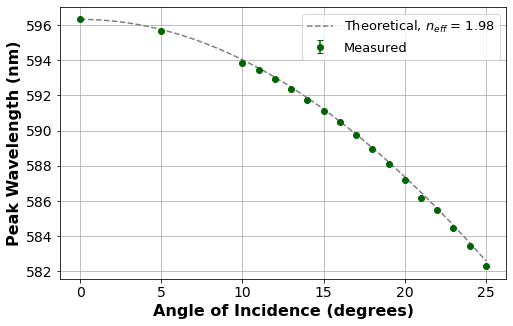

In [189]:
plt.figure(figsize=(8, 5))
plt.plot(smooth_angles, smooth_angle_shift, marker=' ', linestyle='--', color='grey', label='Theoretical, $n_{eff}$ = 1.98')
plt.errorbar(angles, centroids, yerr = CRLB_centroid_uncertainties, marker='o', linestyle=' ', color='darkgreen', label='Measured', capsize=3)
plt.xlabel('Angle of Incidence (degrees)', fontweight='bold', fontsize=16)
plt.ylabel('Peak Wavelength (nm)', fontweight='bold', fontsize=16)
plt.legend(fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True)
plt.show()

Now plot FWHM (found by Gaussian fit) vs AOI

In [228]:
def FWHM_shift(angle):
    normal_FWHM = FWHM_fits[0]
    angle = np.radians(angle)
    return normal_FWHM / np.cos(angle)

In [229]:
smooth_FWHM_shift = FWHM_shift(smooth_angles)

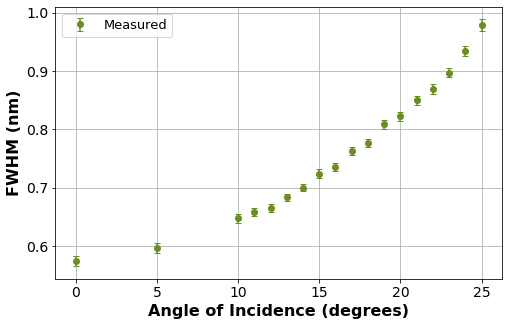

In [231]:
plt.figure(figsize=(8, 5))
# plt.plot(smooth_angles, smooth_FWHM_shift, marker=' ', linestyle='--', color='grey', label='Theoretical')
plt.errorbar(angles, FWHM_fits, yerr = FWHM_uncertainties, marker='o', linestyle=' ', color='olivedrab', label='Measured', capsize=3)
plt.xlabel('Angle of Incidence (degrees)', fontweight='bold', fontsize=16)
plt.ylabel('FWHM (nm)', fontweight='bold', fontsize=16)
plt.legend(fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True)
plt.show()